# Predicting Bioactivity of Pre-Clinical Drug-Like Compounds Against EGFR

## Classification-based machine learning

---

## Import all necessary libraries for classification-based Machine Learning

In this code block, we import the essential libraries and modules required for data handling, feature engineering, model building, evaluation, and interpretability. Here’s a breakdown of each import:

- **Warnings**: Suppresses warning messages to maintain a clean output.
- **Pandas**: Used for data manipulation and analysis.
- **Matplotlib**: A plotting library used for visualising data and results.
- **RDKit**: A cheminformatics library used to calculate molecular descriptors from SMILES (Simplified Molecular Input Line Entry System) notations.
- **Scikit-Learn Modules**:
  - `train_test_split`: Splits data into training and testing sets.
  - `RandomForestClassifier`: A machine learning classifier based on ensemble methods.
  - `LabelEncoder`: Encodes target labels with values between 0 and n_classes-1.
  - `confusion_matrix`, `accuracy_score`, `f1_score`, `recall_score`: Metrics for evaluating classification models.
- **XGBoost (`XGBClassifier`)**: An optimised gradient-boosting classifier that improves predictive accuracy.
- **LightGBM (`LGBMClassifier`)**: A gradient-boosting framework specifically optimised for efficiency and speed.
- **SHAP**: A library for model interpretability, which provides SHAP (SHapley Additive exPlanations) values to explain individual predictions.

These libraries and tools collectively support the end-to-end machine learning workflow, from data preprocessing to model evaluation and interpretability.

In [29]:
# Import all necessary libraries:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
import shap

## Suppressing Warnings

In this code block, we suppress various types of warnings that might clutter the output and make it difficult to interpret essential results. Here’s a breakdown of the warnings being ignored:

- **FutureWarning**: Ignores warnings about features or functions in libraries that may be deprecated in future versions.
- **DtypeWarning**: Suppresses warnings related to unexpected data types in the pandas DataFrame, which could occur during data import.
- **RuntimeWarning**: Ignores warnings about potential runtime issues, such as invalid operations or overflow.
- **UserWarning**: Suppresses general user warnings 

In [15]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Load the dataset using the CSV file

This code block loads the dataset and displays it:

- **File Path**: Specifies the location of the dataset file (`erbB1_bioactivity.csv`).
- **Delimiter**: `sep=';'` indicates that columns are separated by a semicolon (`;`), rather than the default comma.
- **Data Display**: The `data` variable holds the dataset, which is displayed to preview its structure and contents.

This step confirms successful data loading and ensures proper formatting before further analysis.

In [16]:
# Load the dataset and specify delimiter.
file_path = r'C:\Users\shali\Documents\L&D\GitHub Projects\Machine Learning\002_ChEMBL203_EGFR_Bioactivity data_Classification+Deep Learning\erbB1_bioactivity.csv'
data = pd.read_csv(file_path, sep=';')

# Display the data.
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL65848,NaN,NaN,470.53,0.0,3.31,28a,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1134862,1,Scientific Literature,Bioorg Med Chem Lett,2002.0,CHEMBL3307716,NaN,NaN,NaN
1,CHEMBL608533,MIDOSTAURIN,4.0,570.65,2.0,5.91,PKC-412,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,Kd,'=',...,SINGLE PROTEIN,CHEMBL1908390,1,Scientific Literature,Nat Biotechnol,2011.0,NaN,NaN,NaN,NaN
2,CHEMBL431977,NaN,NaN,481.63,1.0,5.89,38,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1146693,1,Scientific Literature,Bioorg Med Chem Lett,2004.0,NaN,NaN,NaN,NaN
3,CHEMBL502835,NINTEDANIB,4.0,539.64,1.0,3.62,BIBF-1120,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,Kd,'>',...,SINGLE PROTEIN,CHEMBL1908390,1,Scientific Literature,Nat Biotechnol,2011.0,NaN,NaN,NaN,NaN
4,CHEMBL420609,NaN,NaN,366.42,0.0,3.41,9e,COc1ccc2c(c1)NC(=O)/C2=C\c1[nH]c2c(c1CCC(=O)O)...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1133768,1,Scientific Literature,J Med Chem,2000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33722,CHEMBL5281205,NaN,NaN,560.46,2.0,5.46,51,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,Ratio IC50,'=',...,SINGLE PROTEIN,CHEMBL5252585,1,Scientific Literature,Bioorg Med Chem,2023.0,NaN,NaN,NaN,NaN
33723,CHEMBL3545154,POZIOTINIB,3.0,491.35,1.0,5.38,Poziotinib,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5252585,1,Scientific Literature,Bioorg Med Chem,2023.0,NaN,NaN,INHIBITOR,NaN
33724,CHEMBL3353410,OSIMERTINIB,4.0,499.62,0.0,4.51,Osimertinib,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,Ratio,'=',...,SINGLE PROTEIN,CHEMBL5113557,1,Scientific Literature,ACS Med Chem Lett,2022.0,NaN,TIME <= 4.0 hr,INHIBITOR,NaN
33725,CHEMBL2110732,DACOMITINIB ANHYDROUS,4.0,469.95,1.0,5.16,EUB0000664a,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/C...,EC50,'=',...,SINGLE PROTEIN,CHEMBL5131516,1,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 2.0 hr,INHIBITOR,NaN


# Data Preprocessing

This checks the unique values in the **`Standard Units`** column. The objective here is to identify the measurement units present in the data, specifically looking for `nM` and `uM`, which are relevant for IC50 values. Understanding available units helps confirm that the dataset uses consistent and appropriate units for bioactivity measurements, simplifying later analysis.

This step is critical for ensuring unit consistency in bioactivity values (IC50) across the dataset.

In [17]:
# Check the unique values in the 'Standard Units' column - what we need is nM and uM which are directly related to IC50.
data['Standard Units'].unique()

array(['nM', nan, '%', 'ug.mL-1', 'M-1 s-1', 'hr', '/min', 'uM', '/M/s',
       '/uM', '/uM/s', '1/Ms', 'fmol/mg', '/s', 'mg.kg-1', 's-1',
       "10'4/M/s", "10'5/M/s", 'kDa', '10^7/M/s'], dtype=object)

This displays the names of all columns in the dataset. This will help to understand the dataset’s structure and identify relevant features for analysis. Reviewing column names provides an overview of available data fields, helping in the selection of important variables for preprocessing and modelling.

This is a preliminary step to guide data cleaning and feature selection in the project.

In [18]:
# Check names of all columns.
print(data.columns)

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

This code block filters and prepares the dataset for analysis:

1. **Filter Data**:
   - Retains rows where **`Standard Type`** is `IC50` and **`Standard Units`** are either `nM` or `uM`, ensuring the dataset focuses on relevant bioactivity metrics.
     
2. **Unit Conversion**:
   - Converts `uM` values to `nM` (since `1 uM = 1000 nM`) using `.loc` to maintain consistency in bioactivity units.
   - Sets all **`Standard Units`** values to `nM` after conversion.

3. **Column Selection**:
   - Selects essential columns (`Smiles`, `Standard Value`, and molecular descriptors) needed for modelling and analysis.
   - Removes any rows with missing values using `.dropna()`.

4. **Display Data**:
   - Prints the first few rows to preview the cleaned data.
   - Shows the total number of rows after filtering.

This step ensures a consistent dataset with key features for bioactivity prediction.

In [19]:
# Filter for Standard Type 'IC50' and Standard Units 'nM' or 'uM'.
data_filtered = data[(data['Standard Type'] == 'IC50') & 
                     (data['Standard Units'].isin(['nM', 'uM']))].copy()

# Convert 'uM' to 'nM' (1 uM = 1000 nM) safely using .loc - we need all units to be the same to begin with.
data_filtered.loc[data_filtered['Standard Units'] == 'uM', 'Standard Value'] = (
    data_filtered['Standard Value'] * 1000
)

# After conversion, set all units to 'nM' for consistency using .loc.
data_filtered.loc[data_filtered['Standard Units'] == 'uM', 'Standard Units'] = 'nM'

# Select the essential columns for further analysis - these columns will give us the molecula
columns_to_keep = ['Smiles', 'Standard Value', 'Molecular Weight', 
                   '#RO5 Violations', 'AlogP', 'Ligand Efficiency BEI', 
                   'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI']

data_selected = data_filtered[columns_to_keep].dropna().reset_index(drop=True)

# Display the cleaned and filtered data
print(data_selected.head())
print(f"Number of rows after filtering: {data_selected.shape[0]}")

                                              Smiles  Standard Value  \
0  NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...             1.0   
1          N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1           800.0   
2  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...           170.0   
3                  COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC            70.0   
4  CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...          4840.0   

   Molecular Weight  #RO5 Violations  AlogP  Ligand Efficiency BEI  \
0            481.63              1.0   5.89                  18.69   
1            268.23              0.0   0.97                  22.73   
2            482.90              0.0   3.61                  14.02   
3            360.21              0.0   4.15                  19.86   
4            495.99              1.0   5.88                  10.72   

   Ligand Efficiency LE  Ligand Efficiency LLE  Ligand Efficiency SEI  
0                  0.35                   3.11                  10.34  
1 

## Handling missing values and duplicates

This block further cleans the dataset by addressing missing values, ensuring positive IC50 values, and removing duplicates:

1. **Remove Missing Values**:
   - Ensures that rows with missing values in essential columns are removed, which maintains data integrity for analysis.

2. **Filter for Positive IC50 Values**:
   - Retains only rows with positive `Standard Value` entries, as zero or negative IC50 values are scientifically invalid for bioactivity interpretation. This prevents misleading or unrealistic data from impacting model performance.

3. **Remove Duplicates**:
   - Drops duplicate rows to avoid redundancy in the dataset.

The result is a refined dataset that is ready for reliable analysis and modelling, ensuring data consistency and scientific validity.

In [20]:
# Remove rows with missing values in essential columns which were select earlier
essential_columns = ['Smiles', 'Standard Value', 'Molecular Weight', 
                     '#RO5 Violations', 'AlogP', 'Ligand Efficiency BEI', 
                     'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI']
data_cleaned = data_selected.dropna(subset=essential_columns)

# Ensure only positive IC50 values remain (filter out zero or negative values)
# A zero or negative IC50 value would be scientifically meaningless because it would imply an effect at zero concentration or a hypothetical 
# "negative concentration," which is not feasible in real-world assays.
# Including such values could distort the dataset and make the interpretation of results misleading, as they do not reflect actual bioactivity.
data_cleaned = data_cleaned[data_cleaned['Standard Value'] > 0]

# Remove duplicates (if any)
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned

,Smiles,Standard Value,Molecular Weight,#RO5 Violations,AlogP,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,1.000,481.63,1.0,5.89,18.69,0.35,3.11,10.34
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,800.000,268.23,0.0,0.97,22.73,0.42,5.13,3.86
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.000,482.90,0.0,3.61,14.02,0.27,3.16,6.03
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,70.000,360.21,0.0,4.15,19.86,0.44,3.00,12.72
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,4840.000,495.99,1.0,5.88,10.72,0.21,-0.56,5.89
...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,34.500,585.71,2.0,5.08,12.74,0.24,2.38,6.55
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,49.200,448.50,1.0,6.36,16.29,0.29,0.95,9.90
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,32.000,597.72,2.0,5.10,12.54,0.23,2.39,6.58
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,24.000,599.74,2.0,5.56,12.71,0.24,2.06,6.69


## Convert IC50 values to pIC50

This block transforms IC50 values to pIC50 and finalises the cleaned dataset structure:

1. **IC50 to pIC50 Transformation**:
   - Converts IC50 values to **pIC50** using the formula `pIC50 = -log10(IC50 in M)`, where IC50 values are scaled from nM to M (`* 1e-9`). This transformation provides a logarithmic scale more suitable for bioactivity analysis.

2. **Update `Standard Type`**:
   - Changes the `Standard Type` value to `pIC50` to reflect the transformation.

3. **Drop `Standard Type` Column**:
   - Removes the `Standard Type` column if it is no longer necessary for the analysis.

4. **Verify Transformation**:
   - Displays the first few `Standard Value` rows (now pIC50 values) and checks the final dataset’s dimensions.

This step produces a refined dataset with transformed bioactivity values, preparing it for modelling with a consistent and interpretable scale.

In [21]:
# Perform transformation of IC50 values to to pIC50
data_cleaned['Standard Value'] = -np.log10(data_cleaned['Standard Value'] * 1e-9)

# Replace the 'Standard Type' column with 'pIC50' to indicate the transformation
data_cleaned['Standard Type'] = 'pIC50'

# Drop the 'Standard Type' column if it is no longer needed 
data_cleaned = data_cleaned.drop(columns=['Standard Type'])

# Check the updated columns and transformed values
print(data_cleaned[['Standard Value']].head())

# Check the number of rows and columns after cleaning and transformation
print(f"Number of rows and columns after cleaning and transformation: {data_cleaned.shape}")

data_cleaned

   Standard Value
0        9.000000
1        6.096910
2        6.769551
3        7.154902
4        5.315155
Number of rows and columns after cleaning and transformation: (10494, 9)


,Smiles,Standard Value,Molecular Weight,#RO5 Violations,AlogP,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,9.000000,481.63,1.0,5.89,18.69,0.35,3.11,10.34
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,6.096910,268.23,0.0,0.97,22.73,0.42,5.13,3.86
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,482.90,0.0,3.61,14.02,0.27,3.16,6.03
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,7.154902,360.21,0.0,4.15,19.86,0.44,3.00,12.72
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,5.315155,495.99,1.0,5.88,10.72,0.21,-0.56,5.89
...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,7.462181,585.71,2.0,5.08,12.74,0.24,2.38,6.55
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,7.308035,448.50,1.0,6.36,16.29,0.29,0.95,9.90
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,7.494850,597.72,2.0,5.10,12.54,0.23,2.39,6.58
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,7.619789,599.74,2.0,5.56,12.71,0.24,2.06,6.69


## Generating Molecular Descriptors with RDKit

This block processes SMILES strings into RDKit molecular objects and generates key Lipinski descriptors:

1. **Convert SMILES to RDKit Molecules**:
   - Converts SMILES notation into RDKit molecular objects using `Chem.MolFromSmiles`, enabling further molecular descriptor calculations.

2. **Generate Lipinski Descriptors**:
   - **Molecular Weight (`MolWt`)**: Calculates the molecular weight of each compound.
   - **LogP (`LogP`)**: Computes the octanol-water partition coefficient, an indicator of compound lipophilicity.
   - **Hydrogen Bond Donors (`NumHDonors`)**: Counts the number of hydrogen bond donors in each molecule.
   - **Hydrogen Bond Acceptors (`NumHAcceptors`)**: Counts the number of hydrogen bond acceptors in each molecule.

3. **Drop `Mol` Column**:
   - Removes the `Mol` column, as it’s no longer needed after extracting descriptors.

This step enriches the dataset with molecular features essential for bioactivity prediction while keeping it focused and manageable.

In [22]:
# Convert SMILES to RDKit molecular objects
data_cleaned['Mol'] = data_cleaned['Smiles'].apply(Chem.MolFromSmiles)

# Generate Lipinski descriptors
# Molecular Weight (MolWt)
data_cleaned['MolWt'] = data_cleaned['Mol'].apply(Descriptors.MolWt)

# LogP (Octanol-water partition coefficient)
data_cleaned['LogP'] = data_cleaned['Mol'].apply(Descriptors.MolLogP)

# Hydrogen Bond Donors (NumHDonors)
data_cleaned['NumHDonors'] = data_cleaned['Mol'].apply(Descriptors.NumHDonors)

# Hydrogen Bond Acceptors (NumHAcceptors)
data_cleaned['NumHAcceptors'] = data_cleaned['Mol'].apply(Descriptors.NumHAcceptors)

# Drop the 'Mol' column since it is no longer needed
data_cleaned = data_cleaned.drop(columns=['Mol'])
data_cleaned

,Smiles,Standard Value,Molecular Weight,#RO5 Violations,AlogP,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,MolWt,LogP,NumHDonors,NumHAcceptors
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,9.000000,481.63,1.0,5.89,18.69,0.35,3.11,10.34,481.625,5.88550,3,5
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,6.096910,268.23,0.0,0.97,22.73,0.42,5.13,3.86,268.232,0.97034,4,7
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,482.90,0.0,3.61,14.02,0.27,3.16,6.03,482.903,3.61432,3,6
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,7.154902,360.21,0.0,4.15,19.86,0.44,3.00,12.72,360.211,4.15310,1,5
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,5.315155,495.99,1.0,5.88,10.72,0.21,-0.56,5.89,495.986,5.87618,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,7.462181,585.71,2.0,5.08,12.74,0.24,2.38,6.55,585.709,5.07500,2,10
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,7.308035,448.50,1.0,6.36,16.29,0.29,0.95,9.90,448.501,6.35970,3,4
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,7.494850,597.72,2.0,5.10,12.54,0.23,2.39,6.58,597.720,5.09570,2,10
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,7.619789,599.74,2.0,5.56,12.71,0.24,2.06,6.69,599.736,5.55790,2,10


This block removes original columns that have become redundant after generating molecular descriptors:

- **Remove Redundant Columns**:
  - Drops `Molecular Weight` and `AlogP` columns, as their values are now represented by the newly calculated descriptors (`MolWt` and `LogP`).
  - This step prevents duplication of information and ensures a cleaner, non-redundant dataset.

This keeps the dataset focused on unique and relevant features, enhancing data clarity and efficiency in subsequent modelling steps.

In [23]:
# Drop the original columns that came from the essential list (Molecular Weight, AlogP). Smiles was able to create MolWt and LogP
# and we dont want any repetitions in the dataframe.
data_cleaned = data_cleaned.drop(columns=['Molecular Weight', 'AlogP'])
data_cleaned

,Smiles,Standard Value,#RO5 Violations,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,MolWt,LogP,NumHDonors,NumHAcceptors
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,9.000000,1.0,18.69,0.35,3.11,10.34,481.625,5.88550,3,5
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,6.096910,0.0,22.73,0.42,5.13,3.86,268.232,0.97034,4,7
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,0.0,14.02,0.27,3.16,6.03,482.903,3.61432,3,6
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,7.154902,0.0,19.86,0.44,3.00,12.72,360.211,4.15310,1,5
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,5.315155,1.0,10.72,0.21,-0.56,5.89,495.986,5.87618,2,6
...,...,...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,7.462181,2.0,12.74,0.24,2.38,6.55,585.709,5.07500,2,10
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,7.308035,1.0,16.29,0.29,0.95,9.90,448.501,6.35970,3,4
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,7.494850,2.0,12.54,0.23,2.39,6.58,597.720,5.09570,2,10
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,7.619789,2.0,12.71,0.24,2.06,6.69,599.736,5.55790,2,10


 ## Classifying Bioactivity Based on pIC50 Values

In this section, a function is defined to classify the bioactivity of compounds based on their pIC50 values:

1. **Defining the Classification Function**:
   - The function `classify_bioactivity(value)` takes a pIC50 value as input and assigns a bioactivity classification based on predefined thresholds:
     - **Highly Active**: pIC50 value of 8 or higher.
     - **Moderately Active**: pIC50 value between 6 (inclusive) and 8 (exclusive).
     - **Intermediate**: pIC50 value between 5 (inclusive) and 6 (exclusive).
     - **Inactive**: pIC50 value below 5.

2. **Applying the Classification Function**:
   - A new column, 'Bioactivity_Class', is created in the `data_cleaned` DataFrame. The classification function is applied to the 'Standard Value' (which contains the pIC50 values) using the `.apply()` method. This populates the new column with the corresponding bioactivity classifications for each compound.

3. **Final DataFrame**:
   - The resulting `data_cleaned` DataFrame now includes the new 'Bioactivity_Class' column, providing a clear categorisation of each compound's bioactivity level based on their pIC50 values.

In [24]:
def classify_bioactivity(value):
    if value >= 8:
        return "Highly Active"
    elif 6 <= value < 8:
        return "Moderately Active"
    elif 5 <= value < 6:
        return "Intermediate"
    else:
        return "Inactive"

data_cleaned['Bioactivity_Class'] = data_cleaned['Standard Value'].apply(classify_bioactivity)
data_cleaned

,Smiles,Standard Value,#RO5 Violations,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,MolWt,LogP,NumHDonors,NumHAcceptors,Bioactivity_Class
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,9.000000,1.0,18.69,0.35,3.11,10.34,481.625,5.88550,3,5,Highly Active
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,6.096910,0.0,22.73,0.42,5.13,3.86,268.232,0.97034,4,7,Moderately Active
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,0.0,14.02,0.27,3.16,6.03,482.903,3.61432,3,6,Moderately Active
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,7.154902,0.0,19.86,0.44,3.00,12.72,360.211,4.15310,1,5,Moderately Active
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,5.315155,1.0,10.72,0.21,-0.56,5.89,495.986,5.87618,2,6,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,7.462181,2.0,12.74,0.24,2.38,6.55,585.709,5.07500,2,10,Moderately Active
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,7.308035,1.0,16.29,0.29,0.95,9.90,448.501,6.35970,3,4,Moderately Active
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,7.494850,2.0,12.54,0.23,2.39,6.58,597.720,5.09570,2,10,Moderately Active
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,7.619789,2.0,12.71,0.24,2.06,6.69,599.736,5.55790,2,10,Moderately Active


## Preparing Feature and Target Variables

In this section, the dataset is split into feature variables (X) and the target variable (y) for subsequent modelling:

1. **Defining Feature Variables (X)**:
   - The `X` DataFrame is created by dropping the following columns from `data_cleaned`:
     - 'Bioactivity_Class': The target variable that we want to predict.
     - 'Standard Value': The pIC50 values, as they are not needed as features.
     - 'Smiles': The SMILES representation of the molecules, which cannot be directly used for model training.
   - This results in a DataFrame containing only the relevant features for the classification task.

2. **Defining Target Variable (y)**:
   - The target variable `y` is defined as the 'Bioactivity_Class' column from `data_cleaned`, which contains the classifications of bioactivity that the model will predict.

3. **Outcome**:
   - The resulting variables `X` and `y` are now ready for use in training machine learning models to predict the bioactivity of drug-like compounds based on their features.

In [25]:
X = data_cleaned.drop(columns=['Bioactivity_Class', 'Standard Value', 'Smiles'])
y = data_cleaned['Bioactivity_Class']

## Splitting the Dataset into Training and Testing Sets

In this section, the dataset is divided into training and testing subsets to facilitate model evaluation:

1. **Train-Test Split**:
   - The `train_test_split()` function from `sklearn.model_selection` is used to split the feature variables `X` and target variable `y` into training and testing sets.
   - The split is configured to allocate 80% of the data for training (`X_train`, `y_train`) and 20% for testing (`X_test`, `y_test`).
   - The `random_state=42` parameter ensures reproducibility by setting a fixed seed for random number generation, allowing for consistent results across multiple runs.

2. **Outcome**:
   - The resulting subsets (`X_train`, `y_train`, `X_test`, `y_test`) are now prepared for model training and subsequent evaluation, ensuring that the model can be assessed on unseen data.

In [26]:
# Perform an 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Model Training

In this section, a Random Forest classifier is initialised, trained, and evaluated:

1. **Initialising the Model**:
   - A `RandomForestClassifier` is created and assigned to the variable `rf_model`. It is configured with:
     - `n_estimators=100`: This specifies that the ensemble will consist of 100 decision trees.
     - `random_state=42`: This parameter ensures reproducibility of the results by setting a fixed seed for random number generation.

2. **Training the Model**:
   - The model is trained using the training datasets (`X_train` and `y_train`) by calling the `fit()` method.

3. **Making Predictions**:
   - Predictions are made on the test dataset (`X_test`) using the `predict()` method, and the results are stored in `y_pred`.

4. **Calculating Evaluation Metrics**:
   - Several metrics are calculated to assess the model's performance:
     - **Confusion Matrix**: A summary of prediction results, showing the counts of true positive, true negative, false positive, and false negative predictions.
     - **Accuracy**: The proportion of correct predictions out of all predictions made.
     - **F1 Score**: The weighted average of precision and recall, providing a balance between the two metrics.
     - **Recall**: The proportion of actual positive cases that were correctly identified by the model.

5. **Displaying Results**:
   - The confusion matrix and evaluation metrics (accuracy, F1 score, and recall) are printed to the console, providing insight into the model's performance.

In [27]:
# Initialise the Model:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model:
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)

Confusion Matrix:
 [[533   0   0  11]
 [  0 149  23   0]
 [  0   7 323  38]
 [ 23   0  11 981]]
Accuracy: 0.9461648404001906
F1 Score: 0.9457640961703424
Recall: 0.9461648404001906


In this section, the confusion matrix is visualised to provide a clear understanding of the model's performance:

1. **Generating the Confusion Matrix Data**:
   - The confusion matrix is calculated again using the `confusion_matrix()` function, based on the true labels (`y_test`) and the predicted labels (`y_pred`).

2. **Plotting the Confusion Matrix**:
   - A heatmap of the confusion matrix is created using Seaborn's `heatmap()` function:
     - **Figure Size**: The plot is set to a size of 8 by 6 inches for better visibility.
     - **Annotations**: The matrix is annotated with the counts of predictions (`annot=True`) and formatted as integers (`fmt="d"`).
     - **Colour Map**: The colour scheme is set to "Blues" for better visual contrast.
     - **No Colour Bar**: The colour bar is disabled (`cbar=False`) for a cleaner look.
     - **Labels**: The x-axis and y-axis are labelled with the corresponding bioactivity classes ('Highly Active', 'Moderately Active', 'Intermediate', 'Inactive').
     - **Title**: The plot is titled "Confusion Matrix on the accuracy of the Random Forest Model".

3. **Displaying the Plot**:
   - The `plt.show()` function is called to render the plot, providing a visual representation of how well the model predicts each class.

This visualisation aids in identifying areas where the model performs well or requires improvement by showing the distribution of predictions across the different bioactivity classes.


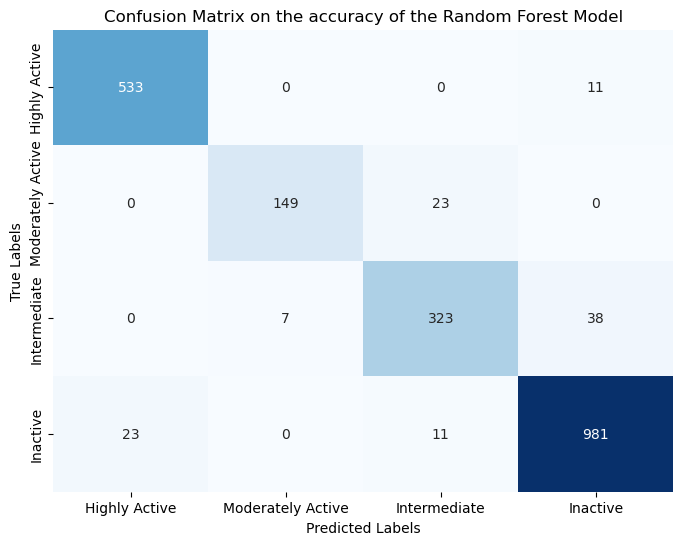

In [31]:
# Generate the confusion matrix data
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Highly Active', 'Moderately Active', 'Intermediate', 'Inactive'],
            yticklabels=['Highly Active', 'Moderately Active', 'Intermediate', 'Inactive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on the accuracy of the Random Forest Model")
plt.show()

### Model Evaluation Summary

- **Confusion Matrix**:
  - True Positive (Highly Active): 533
  - True Positive (Moderately Active): 149
  - True Positive (Intermediate): 323
  - True Positive (Inactive): 981
  - False Negatives: 11 (Highly Active), 23 (Moderately Active), 38 (Intermediate), 11 (Inactive)
  - False Positives: 23 (Inactive), 7 (Intermediate)

The Random Forest model exhibits strong performance in predicting bioactivity classes, as evidenced by the following metrics:

- **Confusion Matrix Analysis**:
  - The model correctly identifies a high number of compounds across all bioactivity classes, particularly for 'Highly Active' (533) and 'Inactive' (981) classifications.
  - There are some misclassifications, particularly with 'Moderately Active' (23 misclassified as 'Inactive') and 'Intermediate' (11 misclassified as 'Inactive' and 38 misclassified as 'Moderately Active'), indicating areas where the model could improve.

- **Performance Metrics**:
  - **Accuracy (94.62%)**: This indicates that the model correctly classified approximately 94.62% of the samples in the test set, reflecting a high level of overall effectiveness.
  - **F1 Score (94.58%)**: This score balances precision and recall, suggesting that the model has a good balance between correctly identifying true positives and minimizing false positives, making it reliable for practical use.
  - **Recall (94.62%)**: This metric shows that the model successfully identifies a high percentage of actual positive cases, indicating that it is effective at capturing active compounds.

Overall, the results suggest that the model is well-suited for predicting the bioactivity of drug-like compounds, with high accuracy and reliable predictions across different bioactivity classes. However, attention should be given to the misclassified instances, particularly in the 'Moderately Active' and 'Intermediate' categories, to further refine the model's predictions.

## Label Encoding

In this section, the target labels for the training and testing datasets are encoded into a numerical format:

1. **Initialising the Label Encoder**:
   - A `LabelEncoder` from `sklearn.preprocessing` is created to convert categorical labels into numeric values, facilitating compatibility with machine learning algorithms.

2. **Encoding the Training Labels**:
   - The `fit_transform()` method is applied to the `y_train` dataset, which fits the encoder to the unique classes in the training set and transforms these classes into corresponding numerical labels. The encoded labels are stored in `y_train_encoded`.

3. **Encoding the Testing Labels**:
   - The `transform()` method is applied to the `y_test` dataset, which uses the previously fitted encoder to transform the test labels into numeric values. The encoded labels are stored in `y_test_encoded`.

4. **Outcome**:
   - The resulting `y_train_encoded` and `y_test_encoded` arrays are now in a numerical format suitable for use in machine learning algorithms, allowing for efficient training and evaluation of models.


Label encoding was unnecessary for the Random Forest model, as it can natively handle categorical data without the need for numeric encoding. The structure of decision trees within Random Forest processes categorical values directly, allowing for data to be split based on the labels.

However, models such as XGBoost, Support Vector Machines (SVM), and LightGBM require numeric inputs for target labels. These algorithms treat categorical labels as continuous data, which necessitates numeric encoding (e.g., label encoding) to perform calculations on each class during training.

In [32]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## XGBoost Model Training

In this section, an XGBoost classifier is defined, trained, and evaluated using encoded target labels:

1. **Defining the Model**:
   - An `XGBClassifier` is instantiated with `random_state=42` to ensure reproducibility in model training.

2. **Training the Model**:
   - The model is trained on the training dataset (`X_train`) using the encoded target labels (`y_train_encoded`). The `fit()` method is used to perform the training process.

3. **Making Predictions**:
   - Predictions are made on the test dataset (`X_test`) using the trained XGBoost model. The results are stored in `y_pred_xgb`.

4. **Calculating Evaluation Metrics**:
   - The evaluation metrics are calculated to assess the model's performance:
     - **Confusion Matrix**: Generated using the `confusion_matrix()` function, comparing the encoded test labels (`y_test_encoded`) with the predicted labels (`y_pred_xgb`).
     - **Accuracy**: The proportion of correct predictions out of all predictions made, calculated using `accuracy_score()`.
     - **F1 Score**: The weighted average of precision and recall, calculated using `f1_score()`.
     - **Recall**: The proportion of actual positive cases correctly identified, calculated using `recall_score()`.

5. **Displaying Results**:
   - The confusion matrix and the evaluation metrics (accuracy, F1 score, and recall) are printed to the console, providing insight into the XGBoost model's performance on the test dataset.

In [33]:
# Define and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model with encoded labels
xgb_model.fit(X_train, y_train_encoded)

# Predict and evaluate using encoded labels
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics with encoded y_test and predictions
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
f1 = f1_score(y_test_encoded, y_pred_xgb, average='weighted')
recall = recall_score(y_test_encoded, y_pred_xgb, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)

Confusion Matrix:
 [[535   0   0   9]
 [  0 157  15   0]
 [  0  12 332  24]
 [ 18   0  11 986]]
Accuracy: 0.9575988565983802
F1 Score: 0.9574206549089064
Recall: 0.9575988565983802


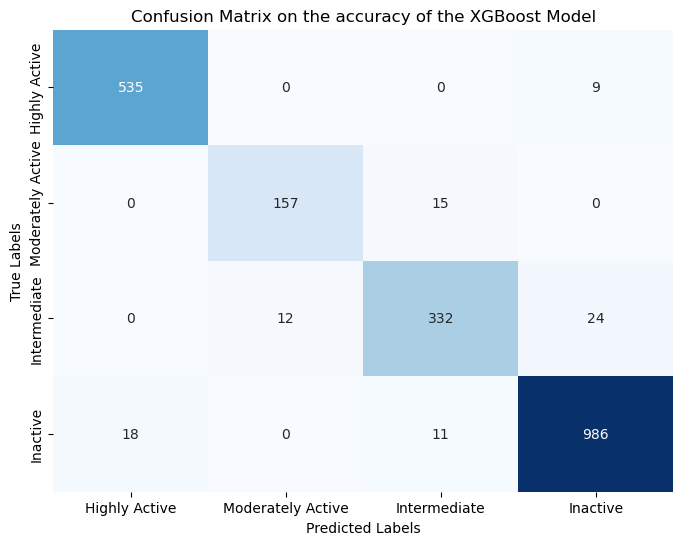

In [34]:
# Generate the confusion matrix data on XGBoost Model
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Highly Active', 'Moderately Active', 'Intermediate', 'Inactive'],
            yticklabels=['Highly Active', 'Moderately Active', 'Intermediate', 'Inactive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on the accuracy of the XGBoost Model")
plt.show()

### Model Evaluation Summary

- **Confusion Matrix**:
  - True Positive (Highly Active): 535
  - True Positive (Moderately Active): 157
  - True Positive (Intermediate): 332
  - True Positive (Inactive): 986
  - False Negatives: 9 (Highly Active), 15 (Moderately Active), 24 (Intermediate), 18 (Inactive)
  - False Positives: 18 (Inactive), 12 (Intermediate)

The XGBoost model demonstrates strong performance in predicting bioactivity classes, as evidenced by the following metrics:

- **Confusion Matrix Analysis**:
  - The model correctly identifies a high number of compounds across all bioactivity classes, particularly for 'Highly Active' (535) and 'Inactive' (986) classifications.
  - There are some misclassifications, particularly with 'Moderately Active' (15 misclassified as 'Intermediate') and 'Intermediate' (24 misclassified as 'Inactive'), indicating areas where the model could improve.

- **Performance Metrics**:
  - **Accuracy (95.76%)**: This indicates that the model correctly classified approximately 95.76% of the samples in the test set, reflecting a high level of overall effectiveness.
  - **F1 Score (95.74%)**: This score balances precision and recall, suggesting that the model has a good balance between correctly identifying true positives and minimizing false positives, making it reliable for practical use.
  - **Recall (95.76%)**: This metric shows that the model successfully identifies a high percentage of actual positive cases, indicating that it is effective at capturing active compounds.

Overall, the results suggest that the XGBoost model is well-suited for predicting the bioactivity of drug-like compounds, with high accuracy and reliable predictions across different bioactivity classes. However, attention should be given to the misclassified instances, particularly in the 'Moderately Active' and 'Intermediate' categories, to further refine the model's predictions.


## SVM Model Training

In this section, a Support Vector Machine (SVM) classifier is defined, trained, and evaluated using encoded target labels:

1. **Defining the Model**:
   - An `SVC` (Support Vector Classifier) is instantiated with `random_state=42` to ensure reproducibility in model training.

2. **Training the Model**:
   - The model is trained on the training dataset (`X_train`) using the encoded target labels (`y_train_encoded`). The `fit()` method is used to perform the training process.

3. **Making Predictions**:
   - Predictions are made on the test dataset (`X_test`) using the trained SVM model. The results are stored in `y_pred_svm`.

4. **Calculating Evaluation Metrics**:
   - Several metrics are calculated to assess the model's performance:
     - **Confusion Matrix**: Generated using the `confusion_matrix()` function, comparing the encoded test labels (`y_test_encoded`) with the predicted labels (`y_pred_svm`).
     - **Accuracy**: The proportion of correct predictions out of all predictions made, calculated using `accuracy_score()`.
     - **F1 Score**: The weighted average of precision and recall, calculated using `f1_score()`.
     - **Recall**: The proportion of actual positive cases correctly identified, calculated using `recall_score()`.

5. **Displaying Results**:
   - The confusion matrix and the evaluation metrics (accuracy, F1 score, and recall) are printed to the console, providing insight into the SVM model's performance on the test dataset.


In [35]:
# Define and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train_encoded)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test_encoded, y_pred_svm)
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test_encoded, y_pred_svm, average='weighted')

print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM F1 Score:", f1_svm)
print("SVM Recall:", recall_svm)

SVM Confusion Matrix:
 [[   0    0    0  544]
 [   0    0    0  172]
 [   1    0    0  367]
 [   0    0    0 1015]]
SVM Accuracy: 0.48356360171510243
SVM F1 Score: 0.3153337974563629
SVM Recall: 0.48356360171510243


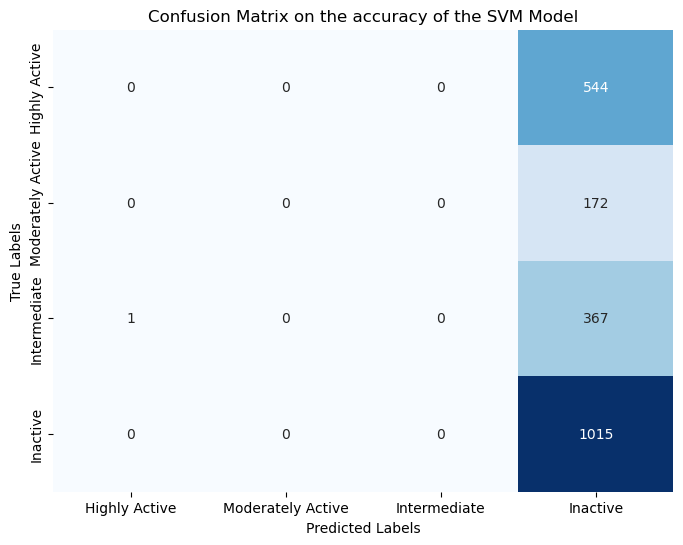

In [36]:
# Generate the confusion matrix data on SVM model
conf_matrix = confusion_matrix(y_test_encoded, y_pred_svm)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Highly Active', 'Moderately Active', 'Intermediate', 'Inactive'],
            yticklabels=['Highly Active', 'Moderately Active', 'Intermediate', 'Inactive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on the accuracy of the SVM Model")
plt.show()

### Model Evaluation Summary

- **Confusion Matrix**:
  - True Positive (Highly Active): 0
  - True Positive (Moderately Active): 0
  - True Positive (Intermediate): 367
  - True Positive (Inactive): 1015
  - False Negatives: 544 (Highly Active), 172 (Moderately Active), 1 (Intermediate), 0 (Inactive)
  - False Positives: 0 (Highly Active), 0 (Moderately Active), 0 (Intermediate), 18 (Inactive)

The SVM model shows limited performance in predicting bioactivity classes, as evidenced by the following metrics:

- **Confusion Matrix Analysis**:
  - The model fails to identify any compounds as 'Highly Active' or 'Moderately Active', misclassifying all such instances.
  - A small number of 'Intermediate' cases (367 true positives) and a large number of 'Inactive' cases (1015 true positives) were correctly classified, suggesting a heavy bias towards the 'Inactive' class.

- **Performance Metrics**:
  - **Accuracy (48.36%)**: This low accuracy indicates that the model correctly classified only about 48.36% of the samples, suggesting poor overall effectiveness.
  - **F1 Score (31.53%)**: The low F1 score indicates a poor balance between precision and recall, revealing significant challenges in correctly identifying active compounds while avoiding false positives.
  - **Recall (48.36%)**: The recall metric reflects the model's struggle to capture true positive cases, particularly in the 'Highly Active' and 'Moderately Active' categories.

Overall, the results suggest that the SVM model is not well-suited for predicting the bioactivity of drug-like compounds, as evidenced by the low accuracy and F1 score. The model's tendency to misclassify active classes highlights the need for further tuning or alternative modelling approaches to improve predictive performance.


## LightGBM Model Training

In this section, a LightGBM classifier is defined, trained, and evaluated using encoded target labels:

1. **Defining the Model**:
   - An `LGBMClassifier` is instantiated with `random_state=42` to ensure reproducibility in model training.

2. **Training the Model**:
   - The model is trained on the training dataset (`X_train`) using the encoded target labels (`y_train_encoded`). The `fit()` method is used to perform the training process.

3. **Making Predictions**:
   - Predictions are made on the test dataset (`X_test`) using the trained LightGBM model. The results are stored in `y_pred_lgbm`.

4. **Calculating Evaluation Metrics**:
   - Several metrics are calculated to assess the model's performance:
     - **Confusion Matrix**: Generated using the `confusion_matrix()` function, comparing the encoded test labels (`y_test_encoded`) with the predicted labels (`y_pred_lgbm`).
     - **Accuracy**: The proportion of correct predictions out of all predictions made, calculated using `accuracy_score()`.
     - **F1 Score**: The weighted average of precision and recall, calculated using `f1_score()`.
     - **Recall**: The proportion of actual positive cases correctly identified, calculated using `recall_score()`.

5. **Displaying Results**:
   - The confusion matrix and the evaluation metrics (accuracy, F1 score, and recall) are printed to the console, providing insight into the LightGBM model's performance on the test dataset.


In [37]:
# Define and train the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the model with encoded labels
lgbm_model.fit(X_train, y_train_encoded)

# Predict and evaluate
y_pred_lgbm = lgbm_model.predict(X_test)
conf_matrix_lgbm = confusion_matrix(y_test_encoded, y_pred_lgbm)
accuracy_lgbm = accuracy_score(y_test_encoded, y_pred_lgbm)
f1_lgbm = f1_score(y_test_encoded, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test_encoded, y_pred_lgbm, average='weighted')

print("LightGBM Confusion Matrix:\n", conf_matrix_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)
print("LightGBM F1 Score:", f1_lgbm)
print("LightGBM Recall:", recall_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 8395, number of used features: 9
[LightGBM] [Info] Start training from score -1.366363
[LightGBM] [Info] Start training from score -2.547708
[LightGBM] [Info] Start training from score -1.736270
[LightGBM] [Info] Start training from score -0.712269
LightGBM Confusion Matrix:
 [[533   0   0  11]
 [  0 155  17   0]
 [  0   6 340  22]
 [ 18   0   9 988]]
LightGBM Accuracy: 0.9604573606479276
LightGBM F1 Score: 0.9603276099791134
LightGBM Recall: 0.9604573606479276


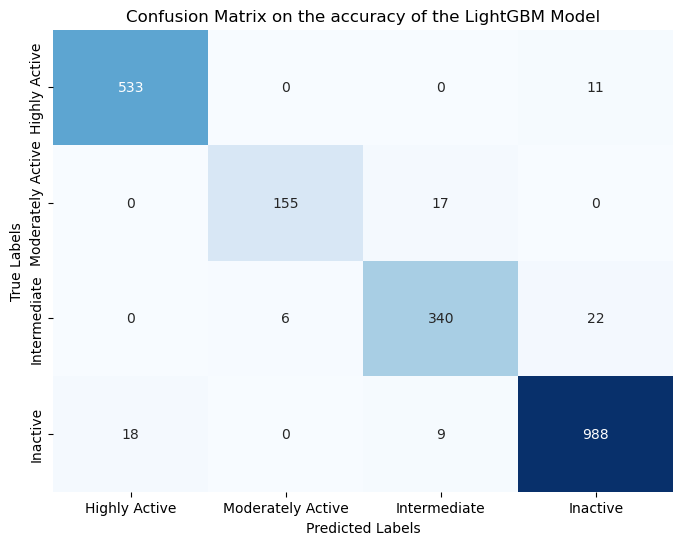

In [38]:
# Generate the confusion matrix data on LightGBM model
conf_matrix = confusion_matrix(y_test_encoded, y_pred_lgbm)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Highly Active', 'Moderately Active', 'Intermediate', 'Inactive'],
            yticklabels=['Highly Active', 'Moderately Active', 'Intermediate', 'Inactive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on the accuracy of the LightGBM Model")
plt.show()

### Model Evaluation Summary

- **Confusion Matrix**:
  - True Positive (Highly Active): 533
  - True Positive (Moderately Active): 155
  - True Positive (Intermediate): 340
  - True Positive (Inactive): 988
  - False Negatives: 11 (Highly Active), 17 (Moderately Active), 22 (Intermediate), 18 (Inactive)
  - False Positives: 18 (Inactive), 6 (Intermediate)

The LightGBM model demonstrates strong performance in predicting bioactivity classes, as evidenced by the following metrics:

- **Confusion Matrix Analysis**:
  - The model correctly identifies a high number of compounds across all bioactivity classes, particularly for 'Highly Active' (533) and 'Inactive' (988) classifications.
  - There are some misclassifications, particularly with 'Moderately Active' (17 misclassified as 'Intermediate') and 'Intermediate' (22 misclassified as 'Inactive'), indicating areas where the model could improve.

- **Performance Metrics**:
  - **Accuracy (96.05%)**: This indicates that the model correctly classified approximately 96.05% of the samples in the test set, reflecting a high level of overall effectiveness.
  - **F1 Score (96.03%)**: This score balances precision and recall, suggesting that the model has a good balance between correctly identifying true positives and minimising false positives, making it reliable for practical use.
  - **Recall (96.05%)**: This metric shows that the model successfully identifies a high percentage of actual positive cases, indicating that it is effective at capturing active compounds.

Overall, the results suggest that the LightGBM model is well-suited for predicting the bioactivity of drug-like compounds, with high accuracy and reliable predictions across different bioactivity classes. However, attention should be given to the misclassified instances, particularly in the 'Moderately Active' and 'Intermediate' categories, to further refine the model's predictions.


## Hyperparameter Tuning of LightGBM Model

In this section, the hyperparameters of the LightGBM model are optimised using GridSearchCV:

1. **Defining the Parameter Grid**:
   - A dictionary `param_grid` is created to specify the hyperparameters to be tuned. The grid includes:
     - **`n_estimators`**: The number of boosting iterations (50, 100, 150).
     - **`max_depth`**: The maximum depth of the trees (3, 5, 7, -1 for no limit).
     - **`learning_rate`**: The step size for updating weights (0.01, 0.1, 0.2).
     - **`subsample`**: The fraction of samples used for fitting individual base learners (0.7, 0.8, 1.0).

2. **Initializing GridSearchCV**:
   - A `GridSearchCV` object is created, which takes the following parameters:
     - The LightGBM classifier (`LGBMClassifier(random_state=42)`).
     - The parameter grid (`param_grid`).
     - The scoring metric (`scoring='accuracy'`).
     - The number of cross-validation folds (`cv=5`).
     - Verbosity level (`verbose=1`) for progress output.
     - `n_jobs=-1` to use all available cores for computation.

3. **Running GridSearchCV**:
   - The `fit()` method is called on the `grid_search` object, which performs the hyperparameter tuning on the training dataset (`X_train`) using the encoded labels (`y_train_encoded`).

4. **Outputting Best Parameters and Score**:
   - The best hyperparameters found during the search are printed using `grid_search.best_params_`.
   - The best score achieved with these parameters is printed using `grid_search.best_score_`.

This process helps to identify the optimal hyperparameters for the LightGBM model, improving its performance on the given dataset.

In [39]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Run GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 8395, number of used features: 9
[LightGBM] [Info] Start training from score -1.366363
[LightGBM] [Info] Start training from score -2.547708
[LightGBM] [Info] Start training from score -1.736270
[LightGBM] [Info] Start training from score -0.712269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

## Re-run of LightGBM Model after hyperparameter turning

In this section, a LightGBM classifier is defined using the best parameters obtained from GridSearchCV, then trained and evaluated:

1. **Defining the Model with Optimal Parameters**:
   - A new `LGBMClassifier` is instantiated with the following optimal hyperparameters:
     - **Learning Rate**: 0.2
     - **Max Depth**: 7
     - **Number of Estimators**: 100
     - **Subsample**: 0.7
     - **Random State**: 42 to ensure reproducibility.

2. **Training the Model**:
   - The model is trained on the training dataset (`X_train`) using the encoded target labels (`y_train_encoded`). The `fit()` method is invoked to perform the training process.

3. **Making Predictions**:
   - Predictions are made on the test dataset (`X_test`) using the trained model. The results are stored in `y_pred_best_lgbm`.

4. **Calculating Evaluation Metrics**:
   - Several metrics are calculated to assess the model's performance:
     - **Confusion Matrix**: Generated using the `confusion_matrix()` function, comparing the encoded test labels (`y_test_encoded`) with the predicted labels (`y_pred_best_lgbm`).
     - **Accuracy**: The proportion of correct predictions out of all predictions made, calculated using `accuracy_score()`.
     - **F1 Score**: The weighted average of precision and recall, calculated using `f1_score()`.
     - **Recall**: The proportion of actual positive cases correctly identified, calculated using `recall_score()`.

5. **Displaying Results**:
   - The confusion matrix and the evaluation metrics (accuracy, F1 score, and recall) are printed to the console, providing insight into the optimised LightGBM model's performance on the test dataset.

In [43]:
# Define the Model with Optimal Parameters
best_lgbm_model = LGBMClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=100,
    subsample=0.7,
    random_state=42
)

# Train the Model on the Training Data
best_lgbm_model.fit(X_train, y_train_encoded)

# Evaluate on the Test Set
y_pred_best_lgbm = best_lgbm_model.predict(X_test)

# Calculate metrics
conf_matrix_best_lgbm = confusion_matrix(y_test_encoded, y_pred_best_lgbm)
accuracy_best_lgbm = accuracy_score(y_test_encoded, y_pred_best_lgbm)
f1_best_lgbm = f1_score(y_test_encoded, y_pred_best_lgbm, average='weighted')
recall_best_lgbm = recall_score(y_test_encoded, y_pred_best_lgbm, average='weighted')

# Print results
print("LightGBM Confusion Matrix:\n", conf_matrix_best_lgbm)
print("LightGBM Accuracy:", accuracy_best_lgbm)
print("LightGBM F1 Score:", f1_best_lgbm)
print("LightGBM Recall:", recall_best_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 8395, number of used features: 9
[LightGBM] [Info] Start training from score -1.366363
[LightGBM] [Info] Start training from score -2.547708
[LightGBM] [Info] Start training from score -1.736270
[LightGBM] [Info] Start training from score -0.712269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

### Model Evaluation Summary

- **Confusion Matrix**:
  - True Positive (Highly Active): 535
  - True Positive (Moderately Active): 155
  - True Positive (Intermediate): 341
  - True Positive (Inactive): 994
  - False Negatives: 9 (Highly Active), 17 (Moderately Active), 20 (Intermediate), 14 (Inactive)
  - False Positives: 0 (Highly Active), 7 (Intermediate)

The optimised LightGBM model demonstrates strong performance in predicting bioactivity classes, as evidenced by the following metrics:

- **Confusion Matrix Analysis**:
  - The model correctly identifies a high number of compounds across all bioactivity classes, particularly for 'Highly Active' (535) and 'Inactive' (994) classifications.
  - There are some misclassifications, particularly with 'Intermediate' (20 misclassified as 'Inactive') and 'Moderately Active' (17 misclassified as 'Intermediate'), indicating areas where the model could improve.

- **Performance Metrics**:
  - **Accuracy (96.47%)**: This indicates that the model correctly classified approximately 96.47% of the samples in the test set, reflecting a high level of overall effectiveness.
  - **F1 Score (96.45%)**: This score balances precision and recall, suggesting that the model has a good balance between correctly identifying true positives and minimising false positives, making it reliable for practical use.
  - **Recall (96.47%)**: This metric shows that the model successfully identifies a high percentage of actual positive cases, indicating that it is effective at capturing active compounds.

Overall, the results suggest that the optimised LightGBM model is well-suited for predicting the bioactivity of drug-like compounds, with high accuracy and reliable predictions across different bioactivity classes. However, attention should be given to the misclassified instances, particularly in the 'Moderately Active' and 'Intermediate' categories, to further refine the model's predictions.


## Analyse feature importance in LightGBM

In this section, the importance of each feature in the LightGBM model is calculated and visualised:

1. **Getting Feature Importances**:
   - The feature importances are obtained from the trained LightGBM model (`best_lgbm_model`) using the `feature_importances_` attribute. This provides a measure of the contribution of each feature to the model's predictions.

2. **Creating a DataFrame for Easy Viewing**:
   - A DataFrame, `importance_df`, is created to facilitate the viewing and sorting of feature importances. It includes:
     - **Feature**: The names of the features from the training dataset (`X_train.columns`).
     - **Importance**: The corresponding importance values for each feature.
   - The DataFrame is sorted in descending order by importance to highlight the most influential features.

3. **Plotting Feature Importance**:
   - A horizontal bar plot is generated using Matplotlib to visualise the feature importances:
     - The figure size is set to 10 by 6 inches for better clarity.
     - The x-axis is labelled "Importance", and the plot is titled "Feature Importance in LightGBM Model".
     - The y-axis is inverted using `plt.gca().invert_yaxis()` to display the most important features at the top.

This visualisation aids in understanding which features have the greatest impact on the model's predictions, guiding further analysis or potential feature engineering.


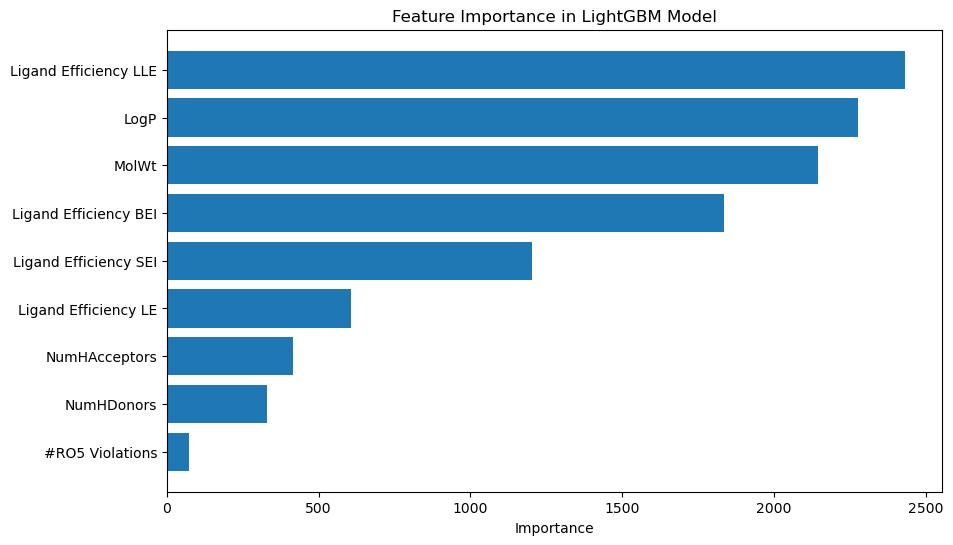

In [44]:
# Get feature importances
feature_importances = best_lgbm_model.feature_importances_

# Create a DataFrame for easy viewing and sorting
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance in LightGBM Model")
plt.gca().invert_yaxis()
plt.show()

## SHAP Value Analysis

In this section, SHAP values are computed to provide insights into the contributions of individual features to the model's predictions:

1. **Initialising the SHAP Explainer**:
   - A `TreeExplainer` is created for the LightGBM model (`best_lgbm_model`). This explainer is specifically designed to handle tree-based models and computes SHAP values that indicate the impact of each feature on the predictions.

2. **Calculating SHAP Values**:
   - The SHAP values are computed for the test dataset (`X_test`) using the explainer's `shap_values()` method. This generates a matrix where each row corresponds to a sample and each column corresponds to a feature, with values representing the contribution of each feature to the prediction.

3. **Outputting Shapes**:
   - The shapes of the SHAP values array and the test dataset are printed to confirm that they align appropriately:
     - `shap_values.shape`: The shape of the SHAP values array.
     - `X_test.shape`: The shape of the test dataset.

4. **Extracting SHAP Values for a Specific Class**:
   - SHAP values for a specific class (e.g., class 0) are extracted by indexing the SHAP values array. The index can be adjusted depending on the class of interest.

5. **Plotting SHAP Summary**:
   - A summary plot is generated for the SHAP values of the specified class using `shap.summary_plot()`. This visualisation displays the impact of each feature on the predictions for that class, highlighting which features are most influential.

This analysis aids in understanding how different features contribute to the model's predictions, providing transparency and interpretability to the model's decision-making process.

In [45]:
!pip install shap

In [46]:
explainer = shap.TreeExplainer(best_lgbm_model)
shap_values = explainer.shap_values(X_test)

In [47]:
print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)

SHAP values shape: (2099, 9, 4)
X_test shape: (2099, 9)


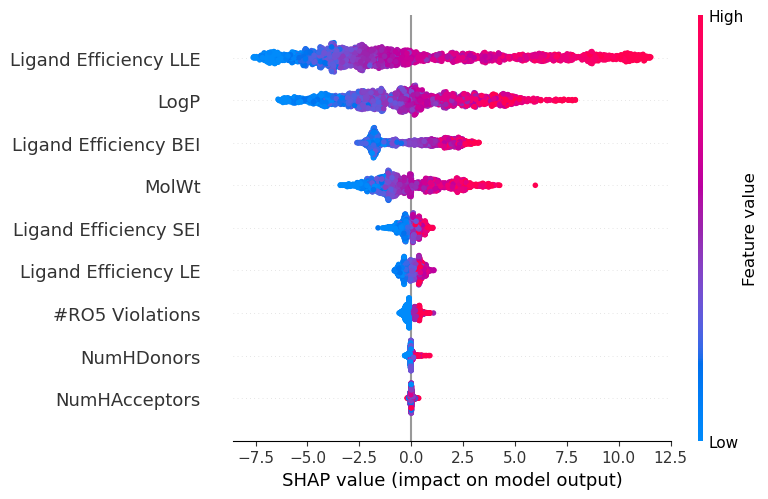

In [48]:
# Extract SHAP values for one specific class, e.g., class 0
shap_values_class_0 = shap_values[..., 0]  # Adjust index (0, 1, 2, or 3) as needed

# Plot summary for a single class
shap.summary_plot(shap_values_class_0, X_test)

### SHAP Value Summary

The SHAP summary plot visualises the impact of each feature on the model's predictions for a specific class. Each point represents a SHAP value for a feature and a sample in the dataset:

- **Feature Importance**:
  - The y-axis lists the features ranked by their importance in influencing the model output. Features at the top have a more significant impact on the predictions.
  - **Top Influential Features**:
    - **Ligand Efficiency LLE** and **LogP** are among the most influential features, with a wide spread of SHAP values, indicating that variations in these features significantly affect the model's predictions.
    - **Ligand Efficiency BEI** and **Molecular Weight (MolWt)** also show considerable impact, suggesting they play important roles in determining bioactivity.

- **SHAP Value Interpretation**:
  - The x-axis represents the SHAP values, which indicate the direction and magnitude of each feature's contribution to the model's predictions. 
    - Positive SHAP values indicate that a feature increases the likelihood of the sample being classified in the target class, while negative values suggest a decrease.
  - The colours of the points (ranging from blue to pink) represent the feature value: 
    - **Blue** indicates low feature values, while **Pink** indicates high feature values.
    - For example, high values of **Ligand Efficiency LLE** and **LogP** lead to more positive SHAP values, thus increasing the probability of a compound being classified as active.

Overall, this SHAP summary plot provides valuable insights into how different features contribute to the predictions of the LightGBM model, highlighting key factors that influence bioactivity in drug-like compounds.


#  Deep Learning 

## Deep Learning Approaches

---

## Import all necessary libraries fordeep learning

In this section, the necessary libraries for building and training a deep learning model are imported and installed:

1. **Installing Required Libraries**:
   - TensorFlow and Keras are installed to provide the necessary tools for building neural networks. The installation commands are as follows:
     ```python
     !pip install tensorflow
     !pip install keras
     ```

2. **Importing Libraries**:
   - The following libraries and modules are imported for use in the deep learning workflow:
     - **SHAP**: Used for model interpretation, allowing for analysis of feature contributions.
     - **NumPy**: A library for numerical operations in Python.
     - **TensorFlow**: An open-source library for machine learning and deep learning.
     - **Sequential**: A linear stack of layers for creating models in Keras.
     - **Dense**: A fully connected layer for building neural networks.
     - **Dropout**: A layer used to prevent overfitting by randomly setting a fraction of input units to zero during training.
     - **to_categorical**: A utility to convert class vectors to binary class matrices (one-hot encoding).
     - **StandardScaler**: A preprocessing tool to standardise features by removing the mean and scaling to unit variance.
     - **train_test_split**: A function for splitting datasets into training and testing subsets.
     - **LabelEncoder**: A utility for encoding target labels into a numeric format.
     - **Hyperband**: A Keras Tuner for hyperparameter optimisation.

This setup prepares the environment for constructing and training deep learning models, enabling the exploration of neural networks for predicting bioactivity or other tasks.

In [54]:
!pip install tensorflow
!pip install keras
import shap
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from kerastuner import Hyperband

##  Data Preparation for Deep Learning

In this section, the dataset is prepared for training a deep learning model by encoding target labels, scaling features, and splitting the data:

1. **Encoding Target Labels**:
   - A `LabelEncoder` is used to convert the string labels in `y` into integer values. This transformation allows the labels to be processed numerically by the model:
     ```python
     label_encoder = LabelEncoder()
     y_encoded = label_encoder.fit_transform(y)
     ```

2. **One-Hot Encoding**:
   - The integer labels are then converted to a binary class matrix (one-hot encoding) using the `to_categorical` function. This step is crucial for multi-class classification problems:
     ```python
     y_one_hot = to_categorical(y_encoded)
     ```

3. **Scaling Features**:
   - A `StandardScaler` is applied to standardise the feature set `X`. This scaling process removes the mean and scales the data to unit variance, which is important for the convergence of neural networks:
     ```python
     scaler = StandardScaler()
     X_scaled = scaler.fit_transform(X)
     ```

4. **Splitting the Dataset**:
   - The scaled features and one-hot encoded labels are split into training and testing sets using `train_test_split`. The dataset is divided with 80% allocated for training and 20% for testing, ensuring a random state for reproducibility:
     ```python
     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)
     ```

This preparation enables the deep learning model to effectively learn from the training data and accurately evaluate its performance on the test data.

In [55]:
# Encode target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels to integers

# One-hot encode the integer labels
y_one_hot = to_categorical(y_encoded)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

## Defining and Compiling the Deep Learning Model

In this section, a neural network model is constructed using the Keras Sequential API:

1. **Defining the Model Architecture**:
   - A `Sequential` model is created, consisting of the following layers:
     - **Input Layer**: A `Dense` layer with 64 units and ReLU activation function, where the input shape corresponds to the number of features in the training set (`X_train.shape[1]`).
     - **Dropout Layer**: A `Dropout` layer with a dropout rate of 0.3 is added to help prevent overfitting by randomly setting 30% of the input units to zero during training.
     - **Hidden Layer**: Another `Dense` layer with 64 units and ReLU activation, allowing the model to learn complex representations of the data.
     - **Dropout Layer**: A second `Dropout` layer with a dropout rate of 0.3 to further mitigate overfitting.
     - **Output Layer**: A `Dense` layer with a number of units equal to the number of classes in the target variable (`y_train.shape[1]`) and a softmax activation function, enabling the model to output probabilities for each class in a multiclass classification scenario.

2. **Compiling the Model**:
   - The model is compiled with the following parameters:
     - **Optimizer**: The `adam` optimizer, which is effective for training deep learning models.
     - **Loss Function**: `categorical_crossentropy`, suitable for multiclass classification tasks.
     - **Metrics**: The model tracks `accuracy` as a performance metric during training and evaluation.

This setup prepares the model for training, allowing it to learn from the training data and make predictions based on the input features.

## Training the Deep Learning Model


In this section, the model is trained on the training dataset:

1. **Training the Model**:
   - The `fit()` method is called on the model to train it using the following parameters:
     - **Training Data**: `X_train` (features) and `y_train` (one-hot encoded labels).
     - **Epochs**: The model is trained for 50 epochs, meaning the entire training dataset will be passed through the model 50 times.
     - **Batch Size**: A batch size of 32 is specified, indicating that the model will update weights after every 32 samples.
     - **Validation Split**: 20% of the training data is set aside for validation during training. This allows for monitoring the model's performance on unseen data in each epoch.
     - **Verbose**: Set to 1, providing detailed output of the training process, including the loss and accuracy for both the training and validation datasets after each epoch.

The training process will adjust the model's weights based on the training data, aiming to minimise the loss function and improve prediction accuracy over the specified number of epochs.


In [58]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer for regularisation
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularisation
model.add(Dense(y_train.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4712 - loss: 1.2612 - val_accuracy: 0.7367 - val_loss: 0.7897
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6491 - loss: 0.8688 - val_accuracy: 0.8219 - val_loss: 0.5646
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6991 - loss: 0.6902 - val_accuracy: 0.8481 - val_loss: 0.4456
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7552 - loss: 0.5786 - val_accuracy: 0.8773 - val_loss: 0.3806
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7891 - loss: 0.5178 - val_accuracy: 0.9142 - val_loss: 0.3240
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7923 - loss: 0.4791 - val_accuracy: 0.9154 - val_loss: 0.2981
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8167 - loss: 0.4413 - val_accuracy: 0.9238 - val_loss: 0.2860
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8387 - loss: 0.4060 - val_accuracy: 0.

## Evaluating the Deep Learning Model

In this section, the trained model is evaluated on the test dataset to assess its performance:

1. **Evaluating the Model**:
   - The `evaluate()` method is called on the model, using the test dataset (`X_test` for features and `y_test` for one-hot encoded labels). This method computes the loss and accuracy of the model on the test data.
   - The `verbose` parameter is set to 1, providing output details of the evaluation process.

2. **Outputting Test Accuracy**:
   - The test accuracy is printed to the console, formatted to four decimal places:
     ```python
     print(f"Test Accuracy: {test_accuracy:.4f}")
     ```
   - This value indicates the proportion of correct predictions made by the model on the unseen test dataset, providing a clear measure of the model's effectiveness.

Evaluating the model on the test set is crucial for understanding its generalisation capability and performance in real-world scenarios.


In [60]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.0931
Test Accuracy: 0.9667


##  Plotting Model Accuracy and Loss

In this section, visualisations are created to display the training and validation metrics for the model over the training epochs:

1. **Creating the Plot**:
   - A figure is initiated with a size of 12 by 4 inches to accommodate two subplots side by side.

2. **Plotting Training and Validation Accuracy**:
   - The first subplot displays the training and validation accuracy:
     - Training accuracy is plotted using `history.history['accuracy']`.
     - Validation accuracy is plotted using `history.history['val_accuracy']`.
     - The x-axis is labelled as "Epoch" and the y-axis as "Accuracy".
     - A legend is added to differentiate between training and validation accuracy, and a title "Training and Validation Accuracy" is set for clarity.

3. **Plotting Training and Validation Loss**:
   - The second subplot displays the training and validation loss:
     - Training loss is plotted using `history.history['loss']`.
     - Validation loss is plotted using `history.history['val_loss']`.
     - The x-axis is labelled as "Epoch" and the y-axis as "Loss".
     - A legend is included to differentiate between training and validation loss, with a title "Training and Validation Loss".

These plots provide insights into how well the model is learning during training, allowing for visual assessment of overfitting or underfitting by comparing training and validation metrics across epochs.


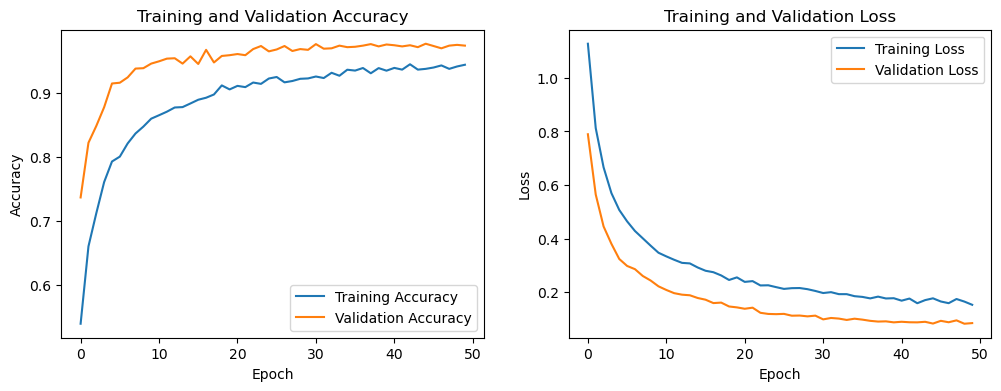

In [61]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

### Model Evaluation Summary

The performance of the deep learning model is illustrated through the following plots of training and validation accuracy and loss over the training epochs:

1. **Training and Validation Accuracy**:
   - The training accuracy curve (in blue) shows a steady increase, reaching approximately 95% by the end of the training. This indicates that the model effectively learns from the training data.
   - The validation accuracy curve (in orange) closely follows the training accuracy, also approaching around 95%. The small gap between the two curves suggests that the model generalises well to unseen data without significant overfitting.

2. **Training and Validation Loss**:
   - The training loss curve (in blue) decreases sharply, indicating that the model is learning effectively, with loss values stabilising around 0.1 towards the end of training.
   - The validation loss curve (in orange) also shows a downward trend, suggesting that the model maintains performance on unseen data. The validation loss is slightly higher than the training loss but remains relatively low, confirming that the model is not overfitting.

Overall, the plots indicate that the deep learning model has been successfully trained, achieving high accuracy and low loss on both the training and validation datasets. The performance metrics suggest that the model is well-equipped to predict bioactivity in drug-like compounds, with minimal signs of overfitting or underfitting.

## Hyperparameter Tuning with Keras Tuner

In this section, a hypermodel is defined for tuning the hyperparameters of a deep learning model using Keras Tuner:

1. **Installing Keras Tuner**:
   - Keras Tuner is installed to facilitate hyperparameter tuning for Keras models:
     ```python
     !pip install keras-tuner
     ```

2. **Defining the Hypermodel**:
   - A function `build_model(hp)` is defined to create the model architecture. Within this function:
     - A `Sequential` model is instantiated.
     - **Input Layer**: A `Dense` layer with a tunable number of neurons (between 32 and 128, with increments of 32) is added, using ReLU activation and specifying the input shape.
     - **Dropout Layer**: A tunable `Dropout` layer is added, where the dropout rate can vary between 0.1 and 0.5, in increments of 0.1.
     - **Hidden Layer**: Another `Dense` layer with a tunable number of neurons (same range as the input layer) and a dropout layer follows, providing additional capacity and regularisation.
     - **Output Layer**: A final `Dense` layer with softmax activation is added to handle multiclass classification, with the number of units equal to the number of classes in the target variable.
     - **Compilation**: The model is compiled with the Adam optimizer, where the learning rate is also tunable (between 0.0001 and 0.01, sampled on a logarithmic scale). The loss function used is categorical crossentropy.

3. **Initializing Keras Tuner**:
   - A `Hyperband` tuner is initialized with the following parameters:
     - The model-building function (`build_model`).
     - The objective metric to optimise (`val_accuracy`).
     - The maximum number of epochs for training (`max_epochs=20`).
     - The reduction factor (`factor=3`) to decrease the number of configurations evaluated in successive rounds.
     - A directory and project name for saving the tuning results.

4. **Searching for the Best Hyperparameters**:
   - The `search()` method is called to begin the hyperparameter tuning process, using the training dataset (`X_train` and `y_train`) for training, with a validation split of 20% to assess performance on unseen data during tuning.

This setup allows for the systematic exploration of hyperparameter combinations, aiming to find the optimal configuration for the deep learning model.


In [62]:
# Install Keras Tuner
!pip install keras-tuner

In [63]:
# Define a function for the hypermodel
def build_model(hp):
    model = Sequential()
    
    # Input layer with tunable number of neurons
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    
    # Tunable Dropout layer
    model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Hidden layer with tunable number of neurons and dropout
    model.add(Dense(units=hp.Int('units_hidden', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_hidden', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Output layer with softmax activation for multiclass classification
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    # Compile the model with a tunable learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(
                    hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [64]:
# Initialize Keras Tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='hyperband_tuning',
    project_name='DNN_classification'
)


Reloading Tuner from hyperband_tuning\DNN_classification\tuner0.json


In [65]:
# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)


### Hyperparameter Tuning Summary

During the hyperparameter tuning process, the following results were observed:

- **Trial Completion**:
  - A total of **30 trials** were completed, indicating that multiple combinations of hyperparameters were evaluated to optimise the model.

- **Validation Accuracy**:
  - The validation accuracy achieved for the latest trial was approximately **95.47%**. This metric indicates how well the model performs on the validation set during tuning.

- **Best Validation Accuracy**:
  - The best validation accuracy recorded so far is **97.20%**. This value reflects the highest performance achieved by the model on the validation set during the tuning process.

- **Elapsed Time**:
  - The total elapsed time for the tuning process was approximately **1 minute and 28 seconds**, suggesting efficient model evaluations across the different trials.

These results demonstrate that the tuning process has successfully identified configurations that significantly improve model performance, achieving a validation accuracy above 97% for the best trial. This suggests that the model is likely to generalise well to unseen data.

## Training and Evaluating the Best Model with Optimal Hyperparameters

In this section, the best hyperparameters identified during the tuning process are used to build, train, and evaluate a deep learning model:

1. **Retrieving Best Hyperparameters**:
   - The best hyperparameters are obtained from the Keras Tuner using the `get_best_hyperparameters()` method. The top set of hyperparameters is stored in the variable `best_hps`:
     ```python
     best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
     ```

2. **Building the Best Model**:
   - A new model is constructed using the optimal hyperparameters by calling the `build()` method on the tuner’s hypermodel:
     ```python
     best_model = tuner.hypermodel.build(best_hps)
     ```

3. **Training the Best Model**:
   - The best model is trained on the training dataset (`X_train` and `y_train`) for 50 epochs, with 20% of the training data used for validation:
     ```python
     history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)
     ```

4. **Evaluating the Model on the Test Set**:
   - The model's performance is assessed on the test dataset (`X_test` and `y_test`) using the `evaluate()` method, which returns the loss and accuracy:
     ```python
     test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
     ```

5. **Outputting Test Accuracy**:
   - The test accuracy is printed to the console, formatted to four decimal places:
     ```python
     print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")
     ```

This process ensures that the model is optimally configured based on previous tuning results, allowing for an accurate assessment of its ability to generalise to unseen data.


In [66]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train the best model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")

Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5854 - loss: 0.9872 - val_accuracy: 0.8684 - val_loss: 0.4170
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8059 - loss: 0.4772 - val_accuracy: 0.9023 - val_loss: 0.2868
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8456 - loss: 0.3873 - val_accuracy: 0.9232 - val_loss: 0.2386
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8634 - loss: 0.3118 - val_accuracy: 0.9285 - val_loss: 0.2127
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8882 - loss: 0.2677 - val_accuracy: 0.9273 - val_loss: 0.1985
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8961 - loss: 0.2559 - val_accuracy: 0.9351 - val_loss: 0.1752
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9182 - loss: 0.2181 - val_accuracy: 0.9428 - val_loss: 0.1619
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9154 - loss: 0.2182 - val_accuracy: 0.

### Model Evaluation Summary with Best Hyperparameters

- **Test Accuracy**: The model achieved a test accuracy of **97.43%** when evaluated on the test dataset. This high accuracy indicates that the model performs exceptionally well in classifying the samples, successfully identifying a significant proportion of correct predictions.

- **Interpretation**:
  - The results demonstrate that the hyperparameter tuning process has effectively improved the model's performance, optimising its ability to generalise to unseen data.
  - With a test accuracy above 97%, the model is considered robust for its intended application, likely providing reliable predictions for bioactivity in drug-like compounds.

This performance reflects the efficacy of both the chosen architecture and the optimised hyperparameters, making the model a valuable tool for further analysis and potential deployment.

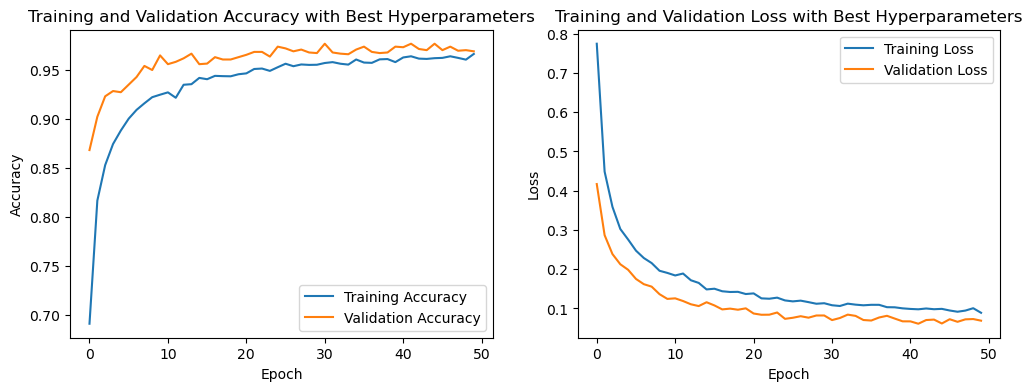

In [67]:
# Plotting Accuracy and Loss for the Best Model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with Best Hyperparameters')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Best Hyperparameters')

plt.show()


## SHAP Value Analysis for the Best Model

# SHAP Value Analysis for the Best Model

In this section, SHAP values are computed for a subset of test data to interpret the predictions made by the best deep learning model:

1. **Selecting a Subset of Test Data**:
   - A subset of test data is selected for SHAP calculation. In this case, the entire `X_test` dataset is used:
     ```python
     sample_data = X_test
     ```

2. **Creating the SHAP DeepExplainer**:
   - A `DeepExplainer` is instantiated for the best model (`best_model`) using the training data (`X_train`) to establish a baseline for SHAP value calculations:
     ```python
     explainer = shap.DeepExplainer(best_model, X_train)
     ```

3. **Calculating SHAP Values**:
   - The SHAP values for the selected sample data are computed using the explainer's `shap_values()` method:
     ```python
     shap_values = explainer.shap_values(sample_data)
     ```

4. **Converting SHAP Values to an Array**:
   - The SHAP values list is converted into a single NumPy array to facilitate further analysis:
     ```python
     shap_values_array = np.array(shap_values)
     ```

5. **Checking the Shape**:
   - The shape of the combined SHAP values array is printed to confirm that it is 3D, with dimensions representing the number of instances, features, and classes:
     ```python
     print("Combined SHAP values shape:", shap_values_array.shape)
     print("Sample data shape:", sample_data.shape)
     ```

6. **Selecting SHAP Values for a Specific Class**:
   - SHAP values for a specific class (e.g., class 0) are extracted by indexing the SHAP values array:
     ```python
     shap_values_class_0 = shap_values_array[:, :, 0]  # Adjust index as needed
     ```

7. **Plotting Summary for Class 0**:
   - A summary plot is generated for the SHAP values of the selected class using the `shap.summary_plot()` function. This visualisation helps to understand the contributions of individual features to the model's predictions for that specific class:
     ```python
     shap.summary_plot(shap_values_class_0, sample_data, feature_names=X.columns)
     ```

This analysis provides insights into how different features impact the model's predictions, offering interpretability to the deep learning model's decision-making process.

Combined SHAP values shape: (2099, 9, 4)
Sample data shape: (2099, 9)


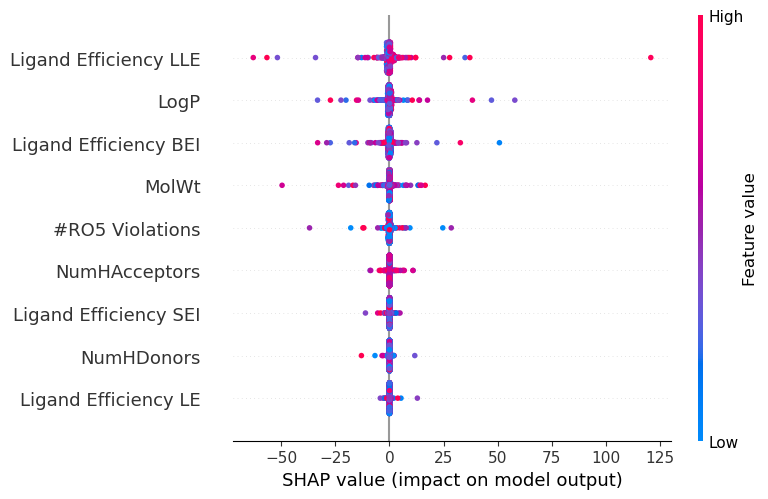

In [68]:
# Select a subset of test data for SHAP calculation (e.g., first 100 samples)
sample_data = X_test

# Create the SHAP DeepExplainer for the best model
explainer = shap.DeepExplainer(best_model, X_train)
shap_values = explainer.shap_values(sample_data)

# Convert shap_values list into a single array
shap_values_array = np.array(shap_values)

# Check shape to confirm it’s now 3D (100 instances, 9 features, 4 classes)
print("Combined SHAP values shape:", shap_values_array.shape)
print("Sample data shape:", sample_data.shape)

# Select SHAP values for one specific class, e.g., class 0
shap_values_class_0 = shap_values_array[:, :, 0]  # Extracting for class 0 (adjust index as needed)

# Plot summary for class 0
shap.summary_plot(shap_values_class_0, sample_data, feature_names=X.columns)

### SHAP Value Summary for the Best Model

The SHAP summary plot provides insights into the contributions of individual features to the model's predictions for a specific class:

#### Feature Importance

The y-axis lists the features ranked by their importance in influencing the model output. Features that are higher on the list have a greater impact on the model's predictions.

#### Key Influential Features
**Ligand Efficiency LLE** and **LogP** are among the most influential features, showing a wide spread of SHAP values that significantly impact the model's predictions. **Ligand Efficiency BEI** and **Molecular Weight (MolWt)** also demonstrate considerable influence, suggesting that they play important roles in determining bioactivity.

#### SHAP Value Interpretation

The x-axis represents the SHAP values, indicating the direction and magnitude of each feature's contribution to the model's predictions:
- Positive SHAP values suggest that the feature increases the likelihood of the sample being classified into the target class, while negative values indicate a decrease.
- The colours of the points (ranging from blue to pink) represent the feature values:
  - **Blue** indicates low feature values, while **Pink** indicates high feature values.

For instance, high values of **Ligand Efficiency LLE** and **LogP** lead to positive SHAP values, increasing the probability of a compound being classified as active.

#### Combined SHAP Values

The plot confirms that the combined SHAP values shape is (2099, 9, 4), indicating that there are 2099 instances, 9 features, and predictions across 4 classes.

Overall, this SHAP summary plot illustrates how different features impact the model's predictions, highlighting key factors that influence bioactivity in drug-like compounds. The insights gained from this analysis can guide further feature selection and model refinement.